In [1]:
using Plots
using LaTeXStrings
using SpecialFunctions

Dieses Notebook umfasst die Grafiken, welche im Abschnitt 5.2 der Bachelorarbeit dargestellt werden. 

In [2]:
#Operatorgeschwindigkeit:
v_O(q) = (q^2-1)/(q^2 + 1)
#Diffusionskonstante:
D(q) = q^2/(q^2+1)^2

D (generic function with 1 method)

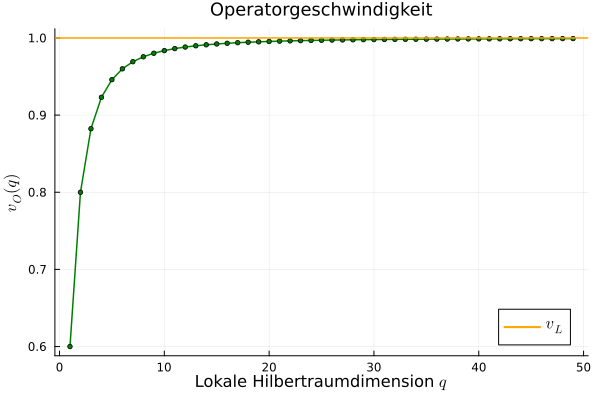

In [3]:
#Plot der Operatorgeschwindigkeit für verschiedene lokale Hilbertraumdimensionen q

plot([v_O(i) for i in 2:50], label = false, linewidth=1.5,color="green")
scatter!([v_O(i) for i in 2:50], label = false, linewidth=1.5,color="green",markersize = 2.5)

xlabel!("Lokale Hilbertraumdimension " * L"q")
ylabel!(L"$v_{O}(q)$")
title!("Operatorgeschwindigkeit",titlefontsize=12)
hline!([1],color="orange",label=L"v_{L}",linewidth=1.5)
plot!(legendfontsize=11)
# savefig("Operatorgeschwindigkeit.pdf")

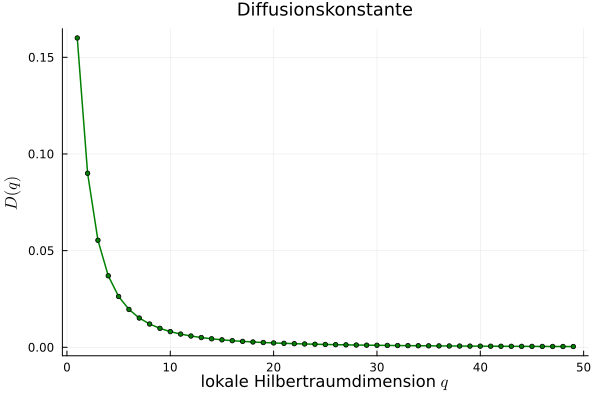

In [4]:
#Plot der Diffusionskonstante für verschiedene lokale Hilbertraumdimensionen q:

plot([D(i) for i in 2:50], label = false, linewidth=1.5,color="green")
scatter!([D(i) for i in 2:50], label = false, linewidth=1.5,color="green",markersize = 2.5)

xlabel!("lokale Hilbertraumdimension " * L"q")
ylabel!(L"$D(q)$")
title!("Diffusionskonstante",titlefontsize=12)
# savefig("Diffusionskonstante.pdf")

In [5]:
#Wahrscheinlichkeiten der Random Walk Gleichung für die Operatordichte rho_R(x,t):

prob_r(q) = (q^2/(q^2+1))^2 #Wahrscheinlichkeit nach rechts zu springen
prob_l(q) = 1/(q^2+1)^2 #Wahrscheinlichkeit nach links zu springen
prob_stay(q) = 2*(q/(q^2+1))^2 #Wahrscheinlichkeit gar nicht zu springen

prob_stay (generic function with 1 method)

Der folgende Plot hat es nicht in die Bachelorarbeit geschafft. Gezeigt ist ein klassischer Random Walk bei dem der Random Walker mit Wahrscheinlichkeit $p^{2}$ nach rechts, mit $(1-p)^{2}$ nach links und mit Wahrscheinlichkeit 2p(1-p) auf der selben Position verweilt. Es werden N Random Walkers initialisiert die T schritte machen. Von der Verteilung der Random Walker wird ein Histogramm erzeugt. Gleichzeitig ist auch eine Simulation der Beweungsgleichung unserer Operatordichte $\rho_{R}(x,t)$ zum Vergleich zu sehen, welche genau mit dem Histogramm übereinstimmt. Die Systemgröße ist 2L+1, also die Anzahl an Gitterpunkten.

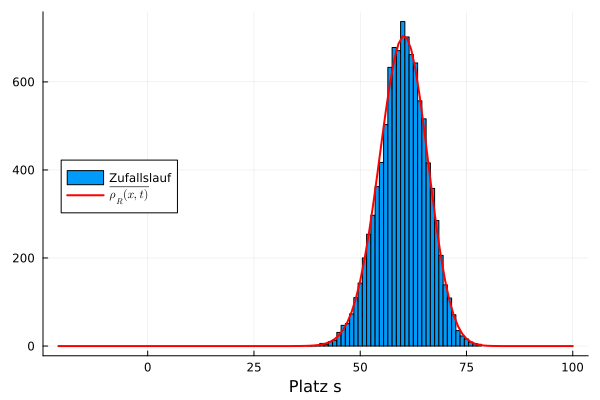

In [10]:
#Simulation der Random Walk Gleichung

#Parameter
N = 10000 #Anzahl Random Walker
T = 100 #Zeitdauer
L = 100 #Kettenlänge

#Kette initialisieren
Kette = collect(-L:L)
#Array welches die Positionen der Random Walker speichert
positionen = zeros(N)
#Array welches die Werte der Operatordichte rho_R an den jeweiligen Positionen abspeichert
rho_R = zeros(2L+1)
#Alle N "Läufer" befinden sich auf Position L+1, um eine Normierte Wahrscheinlichkeitsdichte zu erhalten muss durch N geteilt
#werden. Zum vergleich mit dem Random Walk lassen wir die Normierung weg. 
rho_R[L+1] = N


#Übergangswahrscheinlichkeiten des Random Walks für q=2
p_r = prob_r(2)
p_l = prob_l(2)
p_c = prob_stay(2)

#Erwartungswert mit Anfangsendpunkt bei x_0 = 0
EW = p_r - p_l

for i in 1:T
    
    #Random Walk
    for i in 1:N
        rnd = rand()
        #Erzeuge Zufallsschritt mit den entsprechenden Wahrscheinlichkeiten
        dx = -1*(rnd<p_l)+1*(rnd>(1-p_r))
        positionen[i] += dx
    end
    
    #Simulation der Random Walk Gleichung für rho_R
    rho_R_new = zeros(2L+1)
    for j in 2:2L
        rho_R_new[j] = p_c*rho_R[j] + p_r*rho_R[j-1] + p_l*rho_R[j+1] #Gl. (5.17)
    end
    rho_R = rho_R_new
end

bins = collect(minimum(positionen):maximum(positionen)+1) .- 0.5
#Histogramm des Random Walks
h = histogram(positionen, bins=bins, label="Zufallslauf",legend_position=:left)
#Plot der Simulation für die Random Walk Gleichung
plot!(Kette[80:end], rho_R[80:end], label=L"\overline{\rho_{R}(x,t)}",color="red",lw=2)
xlabel!("Platz s")
# ylabel!("Random Walker")
# vline!([EW*T],color="yellow",label="Erwatungswert " *L"<x>_{t}")

In [11]:
#Analytische Ergebnisse

rhoR(x,t,q) = q^(2(t+x))/(1+q^2)^(2t)*binomial(2t,t+x) #Lösung der Random Walk Gleichung
rhoR_gauß(x,t,q) = 1/sqrt(pi *(1-v_O(q)^2)*t) * exp(-(x - v_O(q)*t)^2 /((1-v_O(q)^2)*t)) #Gaußverteilung 
sigma(q,t) = sqrt(2*t)q/(q^2+1) #Standardabweichung 

sigma (generic function with 1 method)

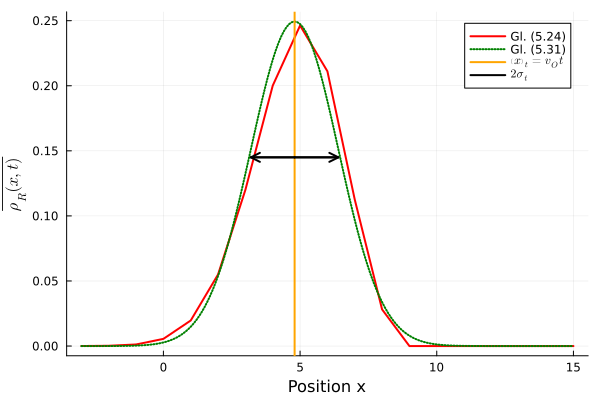

In [15]:
#Exakte Lösung der Operatordichte nach Gl. (5.24) verglichen mit der Gaußkurve (5.31)

#Parameter
xrange = -3:15
xrange2 = -3:0.1:15
t=8
q=2

#Plot der Lösung der Random Walk Gleichung und die Gaußverteilung
plot(xrange,rhoR.(xrange,t,q),label="Gl. (5.24)", color="red",lw=2)
plot!(xrange2,rhoR_gauß.(xrange2,t,q),label="Gl. (5.31)",color="green",lw=2,ls=:dot)

#Erwartungswert einzeichnen (x_0 = 0)
vline!([v_O(2)*t],color="orange",label=L"\left\langle x\right\rangle_{t} = v_{O}t",lw=2)

#Standardabweichung einzeichnen
plot!([v_O(2)*t,v_O(2)*t+sigma(2,t)],[0.145,0.145],arrow=true,color=:black,linewidth=2,label=L"$2\sigma_{t}$")
plot!([v_O(2)*t,v_O(2)*t-sigma(2,t)],[0.145,0.145],arrow=true,color=:black,linewidth=2,label=false)
xlabel!("Position x")
ylabel!(L"\overline{\rho_{R}(x,t)}")
# title!("Vergleich von Gleichung (?) mit (?) zum Zeitpunkt t=8",titlefontsize=12)
# savefig("Vergleich_der_Gleichungen.pdf")

Der Plot ist auch nicht in der Bachelorarbeit. Man sieht aber sehr gut, dass die Gaußkurve mit zunehmender Hilbertraumdimension "schneller" wird und dazu auch schnmaler. Außerdem ist deutlich zu sehen dass die Geschwindigkeit mit der sich die Gaußkurven bewegen bei v=1 saturiert.

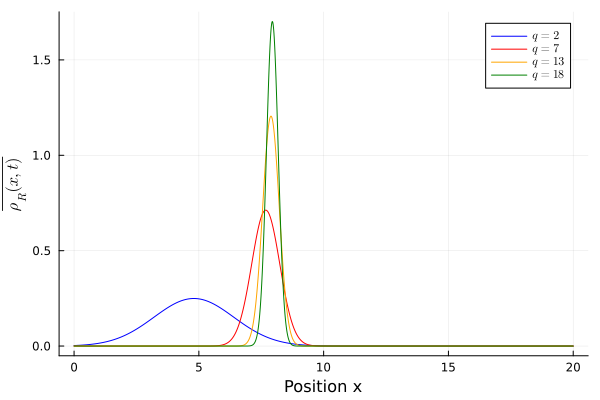

In [9]:
#Gaußverteilung für verschiedene Hilbertraumdimensionen q
t = 8
xrange = 0:0.01:20
q=20

plot(xrange,[rhoR_gauß.(xrange,t,j) for j in 2:5:20], color=["blue" "red" "orange" "green"], label=[L"$q=2$" L"$q=7$" L"$q=13$" L"$q=18$"])
xlabel!("Position x")
ylabel!(L"$\overline{\rho_{R}(x,t)}$")